## Implementação de um Classificador Perceptron

In [38]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [39]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # target - self.predict(xi) -> error
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [40]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## Questao 1 - Implemente uma função para calcular a acurácia do modelo

In [41]:
def accuracy(y_pred, y_true):
    total = len(y_pred)
    matches = np.sum(y_pred == y_true)
    
    return matches / total

## Questao 2 - Implemente um método de validação cruzada para testar 

In [54]:
# Implementar um método de validação cruzada: testar a acurácia média, dado um conjunto de dados de teste.

def train_test_split(train, test):
    X_train = np.array([tr['X'].values.tolist()[0] for tr in train])
    y_train = np.array([tr['y'].values[0] for tr in train])

    X_test = np.array(test['X'].values.tolist())
    y_test = np.array(test['y'].values)
        
    return (X_train, y_train, X_test, y_test)

def cross_validation(dataset, n_folds=10, shuffle=False):
    accs = []

    if shuffle:
        dataset = dataset.reindex(np.random.permutation(dataset.index))
   
    # separado em n folds
    step =  math.floor(len(dataset) / n_folds)
    folds = []
    i = 0
    for _ in range(n_folds):
        folds.append(dataset[i:i+step])
        i += step
    
    folds_aux = folds.copy()
    for i, fold in enumerate(folds):
        test = folds_aux.pop(i)
        train = folds_aux
        
        X_train, y_train, X_test, y_test = train_test_split(train, test)
        
        ppn.fit(X_train, y_train)
        y_pred = ppn.predict(X_test)
        accs.append(accuracy(y_pred, y_test))
        
        folds_aux.insert(i, fold)
    
    return np.mean(accs)

In [55]:
ppn = Perceptron(eta=0.1, n_iter=100)
dataset = pd.DataFrame({'X': [[1, 2], [3, 4], [5, 6], [1, 1], [2, 2], [3, 2], [2, 1]], 'y': [0, 1, 0, 1, 1, 0, 1]})
cross_validation(dataset, n_folds=4, shuffle=False)

0.5

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

In [110]:
def generate_data(n_samples, linear=False):
    random_x = np.arange(0, 10)
    random_y = [0, -1]

    X, y = [], []
    for _ in range(n_samples):
        X.append([random.choice(random_x), random.choice(random_x)])
        if linear:
            if X[-1][0] >= 5:
                y.append(random_y[1])
            else:
                y.append(random_y[0])
        else:
            y.append(random.choice(random_y))

    return np.array(X), np.array(y)

In [111]:
def plot(X, y):
    reds, blues = [], []
    for x, y in zip(X, y):
        if y:
            reds.append(x)
        else:
            blues.append(x)

    transpose_reds = np.transpose(reds)
    transpose_blues = np.transpose(blues)
    
    plt.scatter(transpose_reds[0], transpose_reds[1], c='red')
    plt.scatter(transpose_blues[0], transpose_blues[1], c='blue')
    plt.show()

[-1]


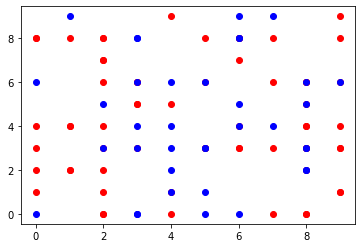

In [112]:
# Não linear
X, y = generate_data(100)
p = Perceptron(eta=0.5, n_iter=100)
p.fit(X, y)
y_pred = p.predict([[4, 7]])
print(y_pred)
plot(X, y)

[1]


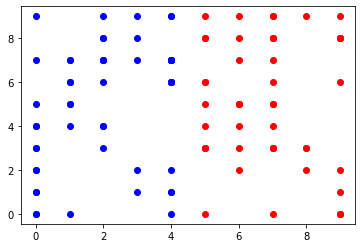

In [115]:
# Linear
Xl, yl = generate_data(100, linear=True)
p = Perceptron(eta=0.5, n_iter=100)
p.fit(Xl, yl)
yl_pred = p.predict([[6, 5]])
print(yl_pred)
plot(Xl, yl)

In [91]:
p = Perceptron(eta=0.5, n_iter=10)
p.fit(X_train, y_train)
p.predict([[4, 7]])

array([1])

## Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso